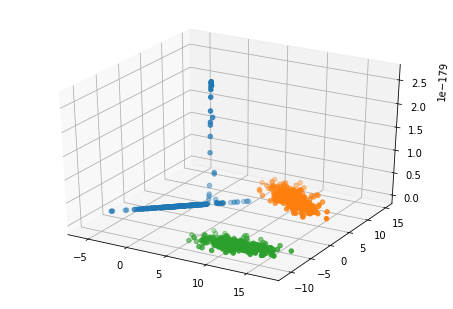

In [3]:
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

#Opening the linearly seperable data file
file = open('Ls.txt', 'r')

#Two arrays for two features
X1 = np.array([])
X2 = np.array([])
for line in file:
    vals = re.findall('[\S]+', line)
    nums = [float(v) for v in vals]
    X1 = np.append(X1, nums[0])
    X2 = np.append(X2, nums[1])

#splitting the data into 3 classes    
X1_class1 = X1[:500]
X2_class1 = X1[:500]
X1_class2 = X1[500:1000]
X2_class2 = X2[500:1000]
X1_class3 = X1[1000:]
X2_class3 = X2[1000:]

#splitting the data of 3 classes into train and test data
# Xij_train means Xi feature of jth class for a sample in training data
X11_train, X11_test, X21_train, X21_test = train_test_split(X1_class1, X2_class1, test_size = 0.3, random_state = 1)
X12_train, X12_test, X22_train, X22_test = train_test_split(X1_class2, X2_class2, test_size = 0.3, random_state = 1)
X13_train, X13_test, X23_train, X23_test = train_test_split(X1_class3, X2_class3, test_size = 0.3, random_state = 1)


X1_train, X1_test, X2_train, X2_test = train_test_split(X1, X2, test_size = 0.3, random_state = 1)
data = np.array(list(zip(X1_train, X2_train))).T

#cov matrix for case1
cov = np.cov(data)

#mean vector of whole data
mean = np.mean(data, axis = 1)

#function to calulate probability for gaussian distribution given the 
#feature vector, mean vector and covariance matrix
def getValue(X, mean, cov):
    det_cov = np.linalg.det(cov)
    v1 = np.matmul((X - mean).T, cov)
    v2 = np.matmul(v1, X - mean)
    power = v2 / -2
    value = np.exp(power)/ math.sqrt(det_cov * 2 * math.pi)
    return value

#evaluating the probabilities for the three classes
y_train_class1 = [getValue(np.array([x1, x2]), mean, cov) for x1, x2 in zip(X11_train, X21_train) ]
y_train_class2= [getValue(np.array([x1, x2]), mean, cov) for x1, x2 in zip(X12_train, X22_train) ]
y_train_class3 = [getValue(np.array([x1, x2]), mean, cov) for x1, x2 in zip(X13_train, X23_train) ]

#Making a scatter plot of the values
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X11_train, X21_train, y_train_class1)
ax.scatter(X12_train, X22_train, y_train_class2)
ax.scatter(X13_train, X23_train, y_train_class3)